In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns
import random as random
import math

from sklearn.linear_model import Perceptron
import matplotlib.patches as mpatches


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_leading_eigenvalue(adj_matrix):
    w, v = LA.eig(adj_matrix)
    lamd_i = max(w)
    lamd_i = lamd_i.real
    return lamd_i

#Non normal networks
def get_non_normal(adj_matrix):
    A_norm = np.linalg.norm(adj_matrix)
    w, v = LA.eig(adj_matrix)
    sum_lambda = sum(w.real**2)
    Df = np.sqrt(A_norm**2 - sum_lambda )
    d_f = Df/A_norm
    return d_f


#lower bounder normality K = L/N
def get_lower_bound(tau, k = 1.23):
    dl_f = np.sqrt(1 - (1/k)*np.exp(2*tau))
    return dl_f

#upper bounder normality K = L/N
def get_upper_bound(tau, L = 15317):
    dl_f = np.sqrt(1 - (1/L)*np.exp(2*tau))
    return dl_f

In [4]:
##tau -- loop exponent
def tau(alpha, qtilde, q):
    return np.log(alpha) + 1/(2*qtilde**2) -1/(2*q**2)

In [5]:
def get_Lb(D):
    
    Lb_ensemble = []
    basal_ensemble_len = 0
    #in degree sequence
    din = list(d for n, d in D.in_degree())

    #out degree sequence
    dout = list(d for n, d in D.out_degree())

    while basal_ensemble_len != 20:
        search_basal_graph=False
        trial=0
        while search_basal_graph==False:
            #print("Trial: ", trial)
            
            # obtain a random graph from the degree sequences
            D1 = nx.directed_configuration_model(din, dout )
            D1 = nx.DiGraph(D1)
            D1.remove_edges_from(nx.selfloop_edges(D1))

            L = D1.number_of_edges()

            #Get the basal nodes (in degree = 0 )
            in_degree = list(D1.in_degree())
            out_degree = list(D1.out_degree())

            #number of basal nodes
            B = 0

            #number of basal edges
            basal_edges = []
            for i in range(len(in_degree)):
                if in_degree[i][1] == 0:
                    B += 1
                    basal_edges.append(out_degree[i][1])

            #print("Number of basal nodes B:", B) ##same as the paper

            if B != 0:
                L_b = sum(basal_edges)
            else:
                print("No basal nodes present")
                #break
            #print(L_b)

            basal_nodes=[]
            for node, indeg in dict(D1.in_degree()).items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
                if indeg == 0:
                    basal_nodes.append(node)

            loop_complete=0
            for nonbasal_node, indeg in dict(D1.in_degree()).items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
                loop_complete+=1
                if indeg != 0: # not a basal node
                    count=0
                    for i in basal_nodes:
                        count+=list(D1.edges()).count((i,nonbasal_node)) # count if it is there or not (1--->2, 2 eats 1)
                    #print(nonbasal_node,":",indeg*L_b/L, count)    
                    #only if both these condition holds, then only we break the loop
                    if math.ceil(indeg*L_b/L)!=count and math.floor(indeg*L_b/L)!=count : #soft constraints
                        break
            if loop_complete==len(dict(D1.in_degree())):
                search_basal_graph=True
                Lb_ensemble.append(L_b)
                basal_ensemble_len+=1
            trial+=1
    #random.seed(12345)
    Lb = random.choice(Lb_ensemble)
    return Lb

In [6]:
def get_Lb_dce(D):
    Lb_ensemble = []
    directConfig_ensemble_len = 0

    while directConfig_ensemble_len != 100:
        

        #in degree sequence
        din = list(d for n, d in D.in_degree())

        #out degree sequence
        dout = list(d for n, d in D.out_degree())

        # obtain a random graph from the degree sequences
        D1 = nx.directed_configuration_model(din, dout,seed=12345)
        D1 = nx.DiGraph(D1)
        D1.remove_edges_from(nx.selfloop_edges(D1))

        L = D1.number_of_edges()

        #Get the basal nodes (in degree = 0 )
        in_degree = list(D1.in_degree())
        out_degree = list(D1.out_degree())

        #number of basal nodes
        B = 0

        #number of basal edges
        basal_edges = []
        for i in range(len(in_degree)):
            if in_degree[i][1] == 0:
                B += 1
                basal_edges.append(out_degree[i][1])

        #print("Number of basal nodes B:", B) ##same as the paper

        if B != 0:
            L_b = sum(basal_edges)
            directConfig_ensemble_len+=1
            Lb_ensemble.append(L_b)
        
        else:
            print("No basal nodes present")
            #break
        #print(L_b)
    random.seed(12345)
    Lb=random.choice(Lb_ensemble)
    return Lb
        
        


In [7]:
def get_main_properties(G):
    #number of nodes
    N = G.number_of_nodes()
    print("Number of nodes N:", N)
    

    connected_component_subgraphs = (G.subgraph(c) for c in nx.strongly_connected_components(G))

    G_giant = max(connected_component_subgraphs, key=len)
    

    N_giant = G_giant.number_of_nodes()
    
    #number of edges
    L = G.number_of_edges()

    print("Number of edges L:", L)
    
    #Get the basal nodes (in degree = 0 )
    in_degree = list(G.in_degree())
    out_degree = list(G.out_degree())
    
    in_degree_giant = list(G_giant.in_degree())

    B_giant = 0
    for i in range(len(in_degree_giant)):
        if in_degree_giant[i][1] == 0:
            B_giant += 1
    frac_non_bassal = (N_giant - B_giant) /N
            
    #number of basal nodes
    B = 0
    
    #number of basal edges
    basal_edges = []
    for i in range(len(in_degree)):
        if in_degree[i][1] == 0:
            B += 1
            basal_edges.append(out_degree[i][1])
            
    print("Number of basal nodes B:", B) ##same as the paper
    
    if B != 0:

        #L_b
        L_b = sum(basal_edges)
        print("Number of basal edges L_B:", L_b) ##same as the paper

        #average degree
        k = sum(d for n, d in G.in_degree()) / float(N)
        print("Average in degree: %8.4f\n" % k)

        #Compute tropich levels
        trophic_levels = nx.algorithms.centrality.trophic_levels(G)
        trophic_levels = [(k, v) for k, v in trophic_levels.items()] 
        s = []
        for i in range(len(trophic_levels)):
            s.append(trophic_levels[i][1])

        
        #trophic incoherence parameter 
        q = nx.trophic_incoherence_parameter(G)
        q_tilde = np.sqrt( L / L_b -1)

        print("Trophic incoherence parameter q: ", q)
        #quotient
        q_qt = q/q_tilde

        print("Quotient q/q_tilde = ", q_qt)

        s_tilde = 1 + (1- B/N)*(L/L_b)
        s_st = sum(s)/len(s)*1/s_tilde


        print("Quotient s/s_tilde = ", s_st)

        out = dict(G.out_degree())
        inn = dict(G.in_degree())
        out = list(out.values())
        inn = list(inn.values())

        #compute alpha
        kinkout =0
        for i in range(len(out)):
            kinkout += out[i] * inn[i]

        alpha_num = kinkout / float(N)
        alpha = alpha_num/k
        alpha_tilde = (L - L_b) / (N - B)
        a_at = alpha / alpha_tilde ##again correct

        print("Quotient alpha/alpha_tilde = ", a_at)


        #compute tau
        tauu = tau(alpha, q_tilde, q) ##again correct
        print("Loop exponent tau =", tauu)


        A = nx.adjacency_matrix(G)
        adj_ = pd.DataFrame(A.todense())
        lamda_i = get_leading_eigenvalue(adj_)
        d_f = get_non_normal(adj_)
        
        
        
    else:
        #if no bassal nodes everything 0
        N = 0
        k =0
        q = 0
        q_tilde =0
        q_qt = 0
        s_st = 0
        a_at = 0
        tauu =0 
        lamda_i = 0
        alpha = 0
        L_b=0
        d_f = 0 
        frac_non_bassal = 0

    df2 = pd.DataFrame([N, B, L_b, round(k, 2), round(q, 2), round(q_tilde, 2), round(q_qt, 2), round(s_st, 2), round(a_at, 2), round(tauu, 2), round(lamda_i, 2), round(alpha, 2), round(d_f, 2), round(frac_non_bassal, 2)])
    return df2.T
    

In [8]:
import glob
import os
# Get a list of all the dat files
dat_files_food = glob.glob('Network_Data_MJS20/FoodWebs/*.dat')

In [9]:
def get_info(dat_files):
    df_results = pd.DataFrame()
    files_names = []
    acyclic = []
    for i in range(len(dat_files)):
        x = np.loadtxt(dat_files[i])
        data = pd.DataFrame(x)
        x = list(zip(data[1], data[0]))
        G_ = nx.DiGraph(x)
        G_.remove_edges_from(nx.selfloop_edges(G_))
        acy = nx.is_directed_acyclic_graph(G_)
        acyclic.append(acy)
        df_tmp_res = get_main_properties(G_)
        df_results = df_results.append(df_tmp_res)
        head, tail = os.path.split(dat_files[i])
        files_names.append(tail[:-4])
        print(tail[:-4])
    df_results.index = files_names
    df_results.columns = ['N', 'B','Lb', '<k>', '$q$', '$q\'$', 'q/q\'', '$s/s\'$', 'α / α\'', '$\tau$', '$\lambda_1$', '$\\alpha$', 'df', 'phi']
    df_results['acy'] = acyclic
    return df_results

In [10]:
df_result_food = get_info(dat_files_food)

Number of nodes N: 29
Number of edges L: 196
Number of basal nodes B: 2
Number of basal edges L_B: 9
Average in degree:   6.7586

Trophic incoherence parameter q:  0.6892367627066949
Quotient q/q_tilde =  0.1512059514786182
Quotient s/s_tilde =  0.17219344240317275
Quotient alpha/alpha_tilde =  0.6629924697151588
Loop exponent tau = 0.49581753915870275
benguela
Number of nodes N: 77
Number of edges L: 240
Number of basal nodes B: 35
Number of basal edges L_B: 216
Average in degree:   3.1169

Trophic incoherence parameter q:  0.1755942292142123
Quotient q/q_tilde =  0.5267826876426368
Quotient s/s_tilde =  1.0196765498652292
Quotient alpha/alpha_tilde =  1.0645833333333332
Loop exponent tau = -12.213248517849875
Berwicktxt
Number of nodes N: 86
Number of edges L: 375
Number of basal nodes B: 49
Number of basal edges L_B: 338
Average in degree:   4.3605

Trophic incoherence parameter q:  0.18684423703785832
Quotient q/q_tilde =  0.5647252355820788
Quotient s/s_tilde =  1.0090324889717308

Number of edges L: 5102
Number of basal nodes B: 49
Number of basal edges L_B: 1410
Average in degree:  14.6189

Trophic incoherence parameter q:  0.601343906039727
Quotient q/q_tilde =  0.37162217806228354
Quotient s/s_tilde =  0.5872564767413379
Quotient alpha/alpha_tilde =  0.6258937395442825
Loop exponent tau = 0.8498319231659772
Lough_Hyne
Number of nodes N: 105
Number of edges L: 343
Number of basal nodes B: 48
Number of basal edges L_B: 262
Average in degree:   3.2667

Trophic incoherence parameter q:  0.3241134072690224
Quotient q/q_tilde =  0.5829148679149672
Quotient s/s_tilde =  0.9890172049133403
Quotient alpha/alpha_tilde =  1.2555879494655005
Loop exponent tau = -2.5633751008349748
Martinstxt
Number of nodes N: 71
Number of edges L: 154
Number of basal nodes B: 28
Number of basal edges L_B: 127
Average in degree:   2.1690

Trophic incoherence parameter q:  0.2298120491976761
Quotient q/q_tilde =  0.49841691608484556
Quotient s/s_tilde =  0.9815299764426947
Quotient alpha/

In [11]:
df_result_food

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
benguela,29.0,2.0,9.0,6.76,0.69,4.56,0.15,0.17,0.66,0.50,2.00,4.59,0.97,0.10,False
Berwicktxt,77.0,35.0,216.0,3.12,0.18,0.33,0.53,1.02,1.06,-12.21,0.00,0.61,1.00,0.00,True
Blackrocktxt,86.0,49.0,338.0,4.36,0.19,0.33,0.56,1.01,1.27,-9.51,0.00,1.27,1.00,0.00,True
bridge,25.0,8.0,34.0,4.16,0.53,1.43,0.37,0.68,0.69,-0.52,1.00,2.86,0.99,0.08,False
Broadtxt,94.0,53.0,524.0,6.00,0.14,0.28,0.49,1.03,1.19,-20.10,0.00,1.16,1.00,0.00,True
broom,85.0,1.0,24.0,2.58,0.40,2.85,0.14,0.30,1.17,-2.08,0.00,2.72,1.00,0.00,True
canton,102.0,54.0,649.0,6.82,0.15,0.27,0.57,1.01,1.22,-14.52,0.00,1.20,1.00,0.00,True
Catlins,48.0,14.0,89.0,2.29,0.20,0.49,0.41,0.96,1.00,-10.90,0.00,0.62,1.00,0.00,True
cayman_islands,242.0,10.0,339.0,15.55,0.77,3.18,0.24,0.29,0.51,1.22,0.00,7.52,1.00,0.00,True
chesapeake,31.0,5.0,23.0,2.16,0.45,1.38,0.32,0.73,0.89,-1.81,0.00,1.51,1.00,0.00,True


In [12]:
#sns.set_theme(style="ticks")
#sns.pairplot(df_result_food)

In [13]:
dat_files_genetic = glob.glob('Network_Data_MJS20/Genetic/*.dat')
df_result_genetic = get_info(dat_files_genetic)

Number of nodes N: 4049
Number of edges L: 11707
Number of basal nodes B: 3967
Number of basal edges L_B: 11623
Average in degree:   2.8913

Trophic incoherence parameter q:  0.08485684665226498
Quotient q/q_tilde =  0.9981742562908585
Quotient s/s_tilde =  1.0000025673789439
Quotient alpha/alpha_tilde =  1.0740846949525518
Loop exponent tau = -0.15775354898629246
net_cancer
Number of nodes N: 418
Number of edges L: 519
Number of basal nodes B: 312
Number of basal edges L_B: 475
Average in degree:   1.2416

Trophic incoherence parameter q:  0.26731397725295536
Quotient q/q_tilde =  0.8782984861823215
Quotient s/s_tilde =  0.9940933149295569
Quotient alpha/alpha_tilde =  0.9376423191452093
Loop exponent tau = -2.5431472843709155
net_coli
Number of nodes N: 1470
Number of edges L: 2909
Number of basal nodes B: 1316
Number of basal edges L_B: 2769
Average in degree:   1.9789

Trophic incoherence parameter q:  0.23148580321628687
Quotient q/q_tilde =  1.029489262637822
Quotient s/s_tilde =

In [14]:
df_result_genetic

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
net_cancer,4049.0,3967.0,11623.0,2.89,0.08,0.09,1.00,1.00,1.07,-0.16,2.54,1.10,1.00,0.0,False
net_coli,418.0,312.0,475.0,1.24,0.27,0.30,0.88,0.99,0.94,-2.54,0.00,0.39,1.00,0.0,True
net_e_coli,1470.0,1316.0,2769.0,1.98,0.23,0.22,1.03,1.00,1.21,0.65,1.62,1.10,1.00,0.0,False
net_m_tuberculosis,1624.0,1542.0,3084.0,1.95,0.17,0.17,1.02,1.00,1.24,0.99,2.00,1.28,1.00,0.0,False
net_non_cancer,4071.0,4004.0,8407.0,2.08,0.08,0.08,0.99,1.00,0.99,-1.54,1.00,0.87,1.00,0.0,False
net_p_aeruginosa,691.0,606.0,910.0,1.43,0.30,0.30,1.00,1.03,1.94,0.58,1.41,1.85,0.99,0.0,False
net_s_cerevisiae,2933.0,2764.0,5964.0,2.10,0.17,0.18,0.98,1.00,1.29,-0.38,1.00,1.43,1.00,0.0,False
net_yeast,688.0,557.0,1021.0,1.57,0.25,0.24,1.04,1.00,0.81,-0.31,1.32,0.36,1.00,0.0,False


In [15]:
dat_files_Language = glob.glob('Network_Data_MJS20/Language/*.dat')
df_result_Language = get_info(dat_files_Language)

Number of nodes N: 50
Number of edges L: 101
Number of basal nodes B: 16
Number of basal edges L_B: 20
Average in degree:   2.0200

Trophic incoherence parameter q:  2.0372783429080203
Quotient q/q_tilde =  1.0123317475178801
Quotient s/s_tilde =  1.1634372600543201
Quotient alpha/alpha_tilde =  1.550177239946217
Loop exponent tau = 1.3094473677848357
net_green_eggs


In [16]:
df_result_Language

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
net_green_eggs,50.0,16.0,20.0,2.02,2.04,2.01,1.01,1.16,1.55,1.31,3.17,3.69,0.87,0.52,False


In [17]:
dat_files_Metabolic = glob.glob('Network_Data_MJS20/Metabolic/*.dat')
df_result_Metabolic = get_info(dat_files_Metabolic)

Number of nodes N: 1267
Number of edges L: 3011
Number of basal nodes B: 36
Number of basal edges L_B: 55
Average in degree:   2.3765

Trophic incoherence parameter q:  13.789932731132666
Quotient q/q_tilde =  1.8810107498820579
Quotient s/s_tilde =  2.0599459100362254
Quotient alpha/alpha_tilde =  4.344486544375631
Loop exponent tau = 2.3515915146192605
net_AG
Number of nodes N: 1172
Number of edges L: 2864
Number of basal nodes B: 40
Number of basal edges L_B: 55
Average in degree:   2.4437

Trophic incoherence parameter q:  13.287751982717316
Quotient q/q_tilde =  1.8593321915307652
Quotient s/s_tilde =  2.0428450076609814
Quotient alpha/alpha_tilde =  4.597101594833845
Loop exponent tau = 2.4412267173164497
net_CE
Number of nodes N: 386
Number of edges L: 792
Number of basal nodes B: 20
Number of basal edges L_B: 25
Average in degree:   2.0518

Trophic incoherence parameter q:  8.977152433195084
Quotient q/q_tilde =  1.6207309364032283
Quotient s/s_tilde =  1.7041910179092
Quotient

In [18]:
df_result_Metabolic

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
net_AG,1267.0,36.0,55.0,2.38,13.79,7.33,1.88,2.06,4.34,2.35,7.62,10.43,0.83,0.93,False
net_CE,1172.0,40.0,55.0,2.44,13.29,7.15,1.86,2.04,4.60,2.44,8.00,11.41,0.83,0.92,False
net_CQ,386.0,20.0,25.0,2.05,8.98,5.54,1.62,1.70,2.55,1.69,5.57,5.34,0.83,0.84,False
net_CT,446.0,19.0,25.0,2.11,11.77,6.05,1.94,2.02,2.77,1.79,6.07,5.93,0.83,0.86,False
net_MJ,1081.0,32.0,56.0,2.40,12.47,6.73,1.85,1.98,4.00,2.27,7.53,9.65,0.83,0.93,False
net_SC,1510.0,43.0,53.0,2.54,14.61,8.45,1.73,1.82,5.54,2.66,9.15,14.29,0.83,0.94,False
net_TH,1111.0,30.0,56.0,2.43,12.17,6.88,1.77,1.90,4.08,2.31,7.59,9.99,0.83,0.93,False


In [19]:
dat_files_neural = glob.glob('Network_Data_MJS20/Neural/*.dat')
df_result_neural = get_info(dat_files_neural)

Number of nodes N: 297
Number of edges L: 2345
Number of basal nodes B: 3
Number of basal edges L_B: 175
Average in degree:   7.8956

Trophic incoherence parameter q:  1.4940696856108986
Quotient q/q_tilde =  0.42428727956625073
Quotient s/s_tilde =  0.38843058549593495
Quotient alpha/alpha_tilde =  1.4211073663938372
Loop exponent tau = 2.166671835080633
net_celegans_neural


In [20]:
df_result_neural

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
net_celegans_neural,297.0,3.0,175.0,7.9,1.49,3.52,0.42,0.39,1.42,2.17,9.15,10.49,0.88,0.8,False


In [21]:
df_result_neural= df_result_neural[(df_result_neural.T != 0).any()]
df_result_neural

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
net_celegans_neural,297.0,3.0,175.0,7.9,1.49,3.52,0.42,0.39,1.42,2.17,9.15,10.49,0.88,0.8,False


In [22]:
#social bring problems and has 0 bassal nodes
#dat_files_social = glob.glob('Network_Data_MJS20/Social/*.dat')
#df_result_social = get_info(dat_files_social)

In [23]:
#df_result_social

In [24]:
dat_files_Trade = glob.glob('Network_Data_MJS20/Trade/*.dat')
df_result_Trade = get_info(dat_files_Trade)

Number of nodes N: 24
Number of edges L: 310
Number of basal nodes B: 2
Number of basal edges L_B: 21
Average in degree:  12.9167

Trophic incoherence parameter q:  4.240100278629447
Quotient q/q_tilde =  1.1429753224131052
Quotient s/s_tilde =  1.1375401763758175
Quotient alpha/alpha_tilde =  1.1042973546154706
Loop exponent tau = 2.683114595985681
net_trade_basic
Number of nodes N: 24
Number of edges L: 135
Number of basal nodes B: 3
Number of basal edges L_B: 8
Average in degree:   5.6250

Trophic incoherence parameter q:  4.214549034053207
Quotient q/q_tilde =  1.0577773029824413
Quotient s/s_tilde =  0.9684734918447497
Quotient alpha/alpha_tilde =  1.2799650043744533
Loop exponent tau = 2.0498441371034284
net_trade_minerals


In [25]:
df_result_Trade

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
net_trade_basic,24.0,2.0,21.0,12.92,4.24,3.71,1.14,1.14,1.10,2.68,14.30,14.51,0.49,0.92,False
net_trade_minerals,24.0,3.0,8.0,5.62,4.21,3.98,1.06,0.97,1.28,2.05,7.25,7.74,0.64,0.88,False


In [26]:
df_result_Trade= df_result_Trade[(df_result_Trade.T != 0).any()]
df_result_Trade

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy
net_trade_basic,24.0,2.0,21.0,12.92,4.24,3.71,1.14,1.14,1.10,2.68,14.30,14.51,0.49,0.92,False
net_trade_minerals,24.0,3.0,8.0,5.62,4.21,3.98,1.06,0.97,1.28,2.05,7.25,7.74,0.64,0.88,False


In [ ]:
df_result_Traderade

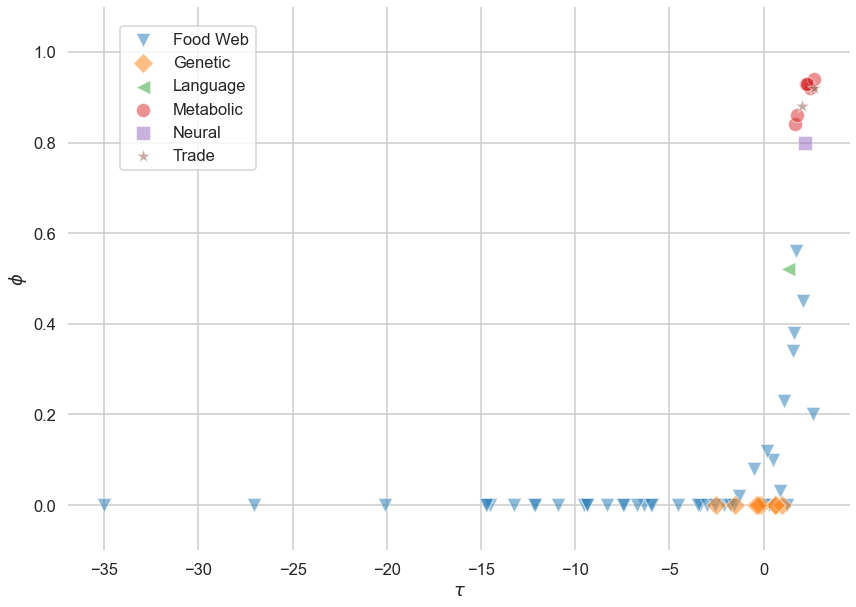

In [27]:
plt.figure(figsize=(14,10))
x = np.linspace(-35, 3.2)
y = np.exp(x)
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(data=df_result_food, x="$\tau$", y="phi", alpha=.5, s= 200,  palette="muted", marker = "v", label = 'Food Web')
sns.scatterplot(data=df_result_genetic, x="$\tau$", y="phi", alpha=.5, s= 200,  palette="muted", marker = "D", label = 'Genetic')
sns.scatterplot(data=df_result_Language, x="$\tau$", y="phi", alpha=.5, s= 200,  palette="muted", marker = "<", label = 'Language')
sns.scatterplot(data=df_result_Metabolic, x="$\tau$", y="phi", alpha=.5, s= 200,  palette="muted",  label = 'Metabolic')
sns.scatterplot(data=df_result_neural, x="$\tau$", y="phi", alpha=.5, s= 200,  palette="muted", marker = "s", label = 'Neural')
sns.scatterplot(data=df_result_Trade, x="$\tau$", y="phi", alpha=.5, s= 200,  palette="muted", marker = "*", label = 'Trade')
#plt.plot(x, y, label = '$\\bar{\\lambda}_i$')
sns.despine(left=True, bottom=True)
plt.xlabel('$\\tau$')
plt.ylabel('$\phi$')
plt.ylim(-0.1,1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.98))

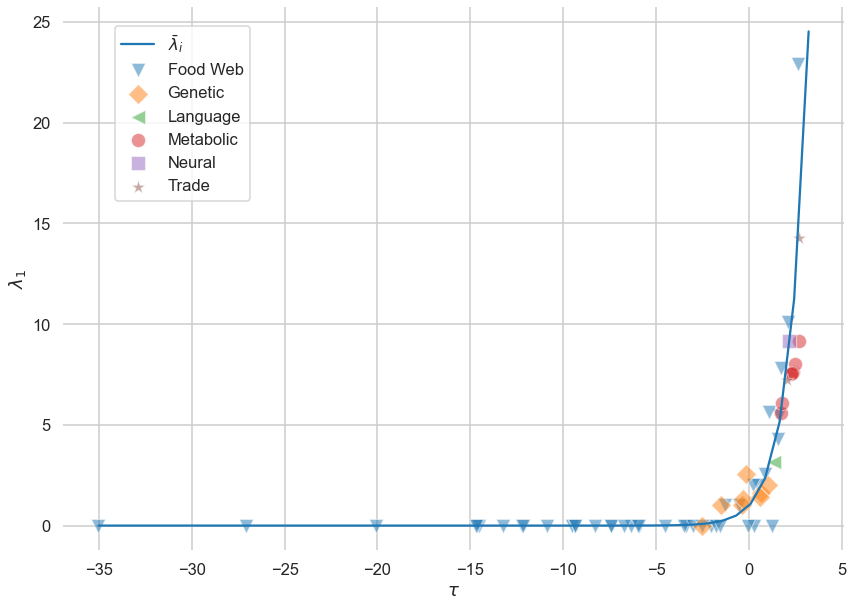

In [28]:
plt.figure(figsize=(14,10))
x = np.linspace(-35, 3.2)
y = np.exp(x)
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(data=df_result_food, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "v", label = 'Food Web')
sns.scatterplot(data=df_result_genetic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "D", label = 'Genetic')
sns.scatterplot(data=df_result_Language, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "<", label = 'Language')
sns.scatterplot(data=df_result_Metabolic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted",  label = 'Metabolic')
sns.scatterplot(data=df_result_neural, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "s", label = 'Neural')
sns.scatterplot(data=df_result_Trade, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "*", label = 'Trade')
plt.plot(x, y, label = '$\\bar{\\lambda}_i$')
sns.despine(left=True, bottom=True)
plt.xlabel('$\\tau$')
plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.98))

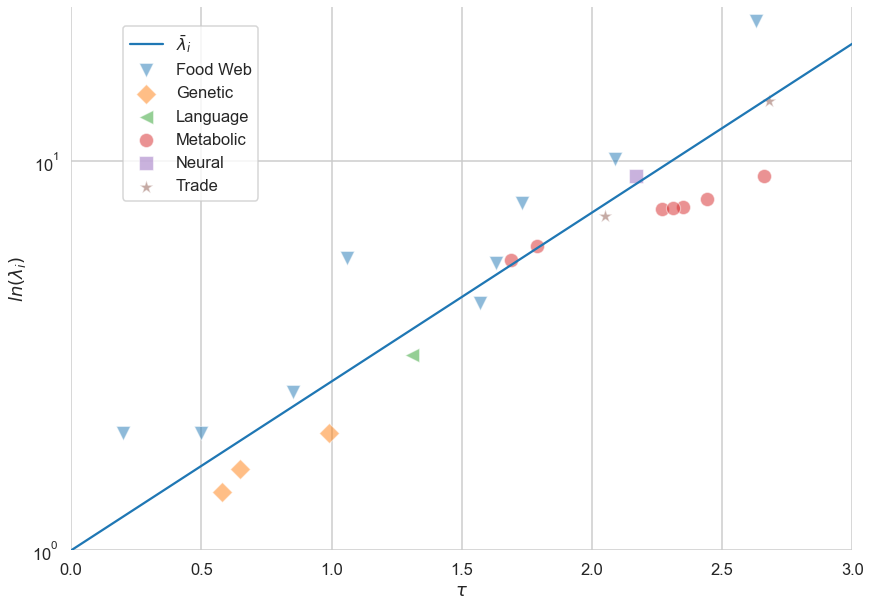

In [29]:
plt.figure(figsize=(14,10))
x = np.linspace(0, 3)
y = np.exp(x)
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(data=df_result_food, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "v", label = 'Food Web')
sns.scatterplot(data=df_result_genetic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "D", label = 'Genetic')
sns.scatterplot(data=df_result_Language, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "<", label = 'Language')
sns.scatterplot(data=df_result_Metabolic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted",  label = 'Metabolic')
sns.scatterplot(data=df_result_neural, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "s", label = 'Neural')
sns.scatterplot(data=df_result_Trade, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "*", label = 'Trade')
plt.plot(x, y, label = '$\\bar{\\lambda}_i$')
sns.despine(left=True, bottom=True)
plt.xlabel('$\\tau$')
plt.ylabel('$ln(\\lambda_i)$')
plt.yscale("log")
plt.xlim(0,3)
plt.ylim(1,25)

plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.98))

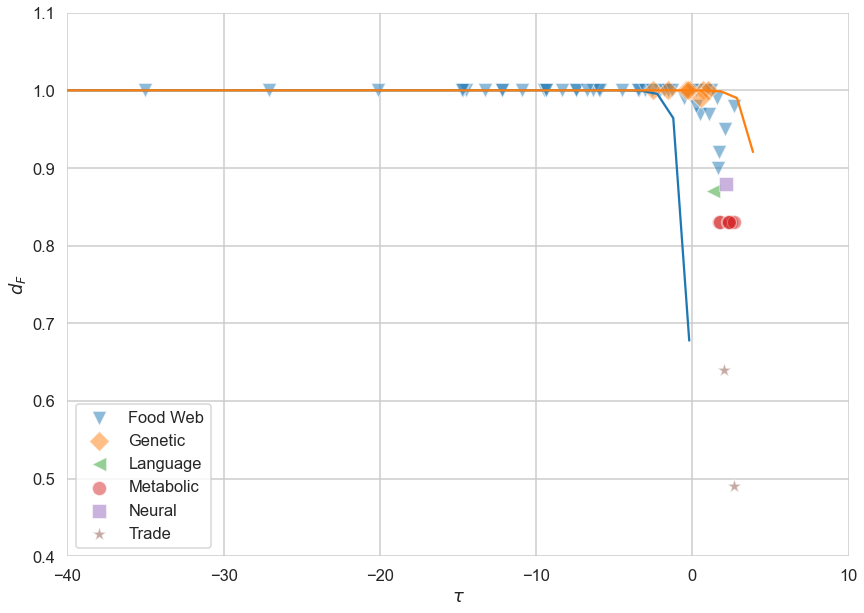

In [112]:
plt.figure(figsize=(14,10))
x = np.linspace(-40, 10)
y = get_lower_bound(x)
y2 = get_upper_bound(x)
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(data=df_result_food, x="$\tau$", y="df", alpha=.5, s= 200,  palette="muted", marker = "v", label = 'Food Web')
sns.scatterplot(data=df_result_genetic, x="$\tau$", y="df", alpha=.5, s= 200,  palette="muted", marker = "D", label = 'Genetic')
sns.scatterplot(data=df_result_Language, x="$\tau$", y="df", alpha=.5, s= 200,  palette="muted", marker = "<", label = 'Language')
sns.scatterplot(data=df_result_Metabolic, x="$\tau$", y="df", alpha=.5, s= 200,  palette="muted",  label = 'Metabolic')
sns.scatterplot(data=df_result_neural, x="$\tau$", y="df", alpha=.5, s= 200,  palette="muted", marker = "s", label = 'Neural')
sns.scatterplot(data=df_result_Trade, x="$\tau$", y="df", alpha=.5, s= 200,  palette="muted", marker = "*", label = 'Trade')
plt.plot(x, y)
plt.plot(x, y2)

sns.despine(left=True, bottom=True)
plt.xlabel('$\\tau$')
plt.ylabel('$d_F$')

plt.xlim(-40,10)
plt.ylim(0.4,1.1)

plt.legend(loc='lower left')

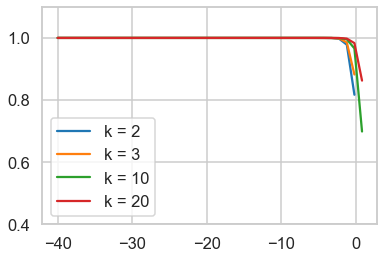

In [31]:
x = np.linspace(-40, 10)
y_2 = get_lower_bound(x, 2)
y_3 = get_lower_bound(x, 3)
y_10 = get_lower_bound(x, 10)
y_20 = get_lower_bound(x, 20)
sns.set_style("whitegrid")
sns.set_context("talk")

plt.plot(x, y_2, label  = 'k = 2')
plt.plot(x, y_3, label  = 'k = 3')
plt.plot(x, y_10, label  = 'k = 10')
plt.plot(x, y_20, label  = 'k = 20')

plt.ylim(0.4, 1.1)
plt.legend(loc='lower left')

In [32]:
def y_plot(q, qt):
    return 1/(np.array(q)**2) -  1/(np.array(qt)**2)

In [33]:
df_result_food["y"] = y_plot(df_result_food['$q$'],df_result_food['$q\'$'] )


In [34]:

df_result_genetic["y"] = y_plot(df_result_genetic['$q$'],df_result_genetic['$q\'$'] )


In [35]:
df_result_Language["y"] = y_plot(df_result_Language['$q$'],df_result_Language['$q\'$'] )


In [36]:
df_result_Metabolic["y"] = y_plot(df_result_Metabolic['$q$'],df_result_Metabolic['$q\'$'] )


In [37]:
df_result_neural["y"] = y_plot(df_result_neural['$q$'],df_result_neural['$q\'$'] )



In [38]:
df_result_Trade["y"] = y_plot(df_result_Trade['$q$'],df_result_Trade['$q\'$'] )


In [39]:
df_result_Trade

,N,B,Lb,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$,df,phi,acy,y
net_trade_basic,24.0,2.0,21.0,12.92,4.24,3.71,1.14,1.14,1.10,2.68,14.30,14.51,0.49,0.92,False,-0.017028
net_trade_minerals,24.0,3.0,8.0,5.62,4.21,3.98,1.06,0.97,1.28,2.05,7.25,7.74,0.64,0.88,False,-0.006709


In [40]:
xpos=[]
ypos=[]
xneg=[]
yneg=[]

for df in [df_result_food,df_result_genetic,df_result_Language,df_result_Metabolic,df_result_neural,df_result_Trade]:
    for i in range(len(df['$\tau$'])):
        if df['$\tau$'][i]>0:
            xpos.append(df["$\\alpha$"][i])
            ypos.append(df["y"][i])
        else:
            xneg.append(df["$\\alpha$"][i])
            yneg.append(df["y"][i])


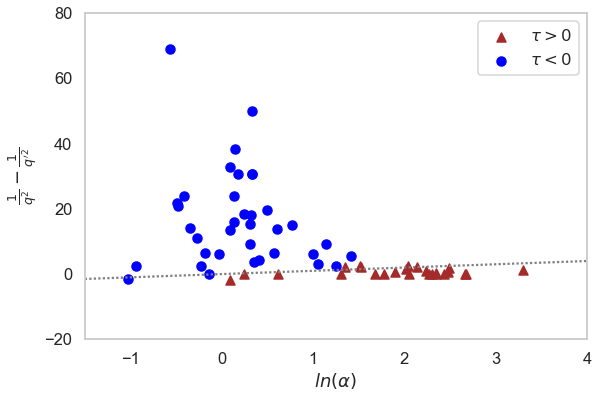

In [41]:
plt.figure(figsize=(9,6))
plt.scatter(np.log(xpos), ypos, marker="^",c='brown',label="$\\tau>0$")
plt.scatter(np.log(xneg), yneg, marker="o",c='blue',label="$\\tau<0$")
plt.xlim([-1.5,4])
plt.ylim([-20,80])
plt.legend(loc='best')
plt.ylabel('$\\frac{1}{q^2} - \\frac{1}{q\'^2}$')
plt.xlabel('$ln(\\alpha)$')

# plt tau = 0 line
plt.plot(np.linspace(-1.5,4,100),np.linspace(-1.5,4,100),dashes=[1,1],
           markersize=1,c='grey')
plt.grid(False)
plt.show()


## Average properties

In [42]:
def get_average_q(df, quantitie):
    mean = round(np.mean(df[quantitie]), 2)
    std = round(np.std(df[quantitie]), 2)
    return mean, std

In [43]:
df_all = [df_result_food,  df_result_genetic, df_result_Language, df_result_Metabolic, df_result_neural, df_result_Trade]

In [44]:
datos = pd.DataFrame()
for j  in (df_result_food.columns[6:11]):
    val = []
    for i in range(len(df_all)):
        mean, std = get_average_q(df_all[i], j)
        val.append(str(mean)+" $\\pm$ "+str(std))
    datos[j] = val

In [45]:
datos.index = ['Food', 'Genetic', 'Language', 'Metabolic', 'Neural', 'Trade']

In [46]:
datos

,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$
Food,0.44 $\pm$ 0.17,0.77 $\pm$ 0.32,1.01 $\pm$ 0.23,-6.23 $\pm$ 7.96,1.54 $\pm$ 4.04
Genetic,0.99 $\pm$ 0.05,1.0 $\pm$ 0.01,1.19 $\pm$ 0.32,-0.34 $\pm$ 1.11,1.36 $\pm$ 0.71
Language,1.01 $\pm$ 0.0,1.16 $\pm$ 0.0,1.55 $\pm$ 0.0,1.31 $\pm$ 0.0,3.17 $\pm$ 0.0
Metabolic,1.81 $\pm$ 0.1,1.93 $\pm$ 0.12,3.98 $\pm$ 0.96,2.22 $\pm$ 0.32,7.36 $\pm$ 1.11
Neural,0.42 $\pm$ 0.0,0.39 $\pm$ 0.0,1.42 $\pm$ 0.0,2.17 $\pm$ 0.0,9.15 $\pm$ 0.0
Trade,1.1 $\pm$ 0.04,1.05 $\pm$ 0.08,1.19 $\pm$ 0.09,2.37 $\pm$ 0.32,10.78 $\pm$ 3.53


benguela           2.00
Berwicktxt         0.00
Blackrocktxt       0.00
bridge             1.00
Broadtxt           0.00
broom              0.00
canton             0.00
Catlins            0.00
cayman_islands     0.00
chesapeake         0.00
coachella          5.48
Coweeta17txt       0.00
Coweeta1txt        0.00
DempstersAutxt     0.00
DempstersSptxt     0.00
DempstersSutxt     0.00
el_verde          10.12
Germantxt          0.00
grass              0.00
Healytxt           0.00
Kyeburntxt         0.00
LilKyeburntxt      0.00
little_rock        5.66
Lough_Hyne         2.56
Martinstxt         0.00
Narrowdaletxt      0.00
NorthColtxt        0.00
Powdertxt          0.00
reef               7.80
shelf              4.32
skipwith           2.00
stony              0.00
Stonytxt           0.00
st_marks           0.00
st_martin          0.00
SuttonAutxt        0.00
SuttonSptxt        0.00
SuttonSutxt        0.00
Troy               0.00
Venlawtxt          0.00
Weddel_sea        22.91
Ythan96         

In [107]:
negative_tau = []
n_acy = []
lamda_positive = []
lambda_negative = []
for i in range(len(df_all)):
    count = 0
    count_acy =0
    values = np.sign(df_all[i]['$\tau$'])
    lamda =df_all[i]['$\lambda_1$']
    for j in range(len(values)):
        if (values[j] < 0):
            count += 1
            lambda_negative.append(lamda[j])
        if (values[j] >=0):
            lamda_positive.append(lamda[j])

        if df_all[i]['acy'][j] == True:
            count_acy +=1
            
            
    negative_tau.append(str(count)+'/'+str(len(df_all[i])))
    n_acy.append(str(count_acy)+'/'+str(len(df_all[i])))

In [108]:
np.mean(lamda_positive)

6.1312000000000015

In [109]:
np.std(lamda_positive)

4.862165213153498

In [110]:
np.mean(lambda_negative)

0.21833333333333335

In [111]:
np.std(lambda_negative)

0.5394930748191099

In [48]:
datos['  $\\tau $ < 0   '] = negative_tau
datos['Acyclic'] = n_acy

,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\tau $ < 0,Acyclic
Food,0.44 $\pm$ 0.17,0.77 $\pm$ 0.32,1.01 $\pm$ 0.23,-6.23 $\pm$ 7.96,1.54 $\pm$ 4.04,31/42,31/42
Genetic,0.99 $\pm$ 0.05,1.0 $\pm$ 0.01,1.19 $\pm$ 0.32,-0.34 $\pm$ 1.11,1.36 $\pm$ 0.71,5/8,1/8
Language,1.01 $\pm$ 0.0,1.16 $\pm$ 0.0,1.55 $\pm$ 0.0,1.31 $\pm$ 0.0,3.17 $\pm$ 0.0,0/1,0/1
Metabolic,1.81 $\pm$ 0.1,1.93 $\pm$ 0.12,3.98 $\pm$ 0.96,2.22 $\pm$ 0.32,7.36 $\pm$ 1.11,0/7,0/7
Neural,0.42 $\pm$ 0.0,0.39 $\pm$ 0.0,1.42 $\pm$ 0.0,2.17 $\pm$ 0.0,9.15 $\pm$ 0.0,0/1,0/1
Trade,1.1 $\pm$ 0.04,1.05 $\pm$ 0.08,1.19 $\pm$ 0.09,2.37 $\pm$ 0.32,10.78 $\pm$ 3.53,0/2,0/2


In [50]:
#Prob acyclic
def p_acy(df):
    results = []
    for i in range(len(df)):
        a1 = 1/(df['α / α\''][i])
        a2 = 1/(df['q/q\''][i])
        tau = df['$\tau$'][i]
        val = np.exp(-a1 * a2 * (1/(np.exp(-tau)-1)))
        results.append(val)
    return results

In [51]:
def count_acyclic(df_):
    p_acyclic = p_acy(df_)
    df_['P'] = p_acyclic 
    n_acycl = len(df_[df_['P'] > 0.5])
    return n_acycl

In [52]:
acyclyc = []
for i in range(len(df_all)):
    n_acycl = count_acyclic(df_all[i])
    acyclyc.append(n_acycl)

In [53]:
acyclyc

[38, 5, 1, 7, 1, 2]

# Applying perceptron

In [54]:

df_pos = pd.DataFrame({'x1':np.log(xpos),'x2':ypos,'y':[1]*len(xpos)})
df_neg = pd.DataFrame({'x1':np.log(xneg),'x2':yneg,'y':[-1]*len(xneg)})

df_perp = pd.concat([df_pos,df_neg],ignore_index=True)
df_perp

,x1,x2,y
0,1.523880,2.052307,1
1,2.017566,1.587737,1
2,1.902108,0.536974,1
3,2.479056,0.782765,1
4,2.134166,2.123609,1
...,...,...,...
56,0.095310,32.793210,-1
57,-0.941609,2.606310,-1
58,-0.139262,0.000000,-1
59,0.357674,3.737879,-1


In [55]:
# shuffle the dataframe
df_perp = df_perp.sample(frac=1).reset_index(drop=True)
df_perp

,x1,x2,y
0,1.305626,-0.007226,1
1,0.086178,13.495263,-1
2,2.350422,0.369723,1
3,0.131028,23.856156,-1
4,0.307485,9.195116,-1
...,...,...,...
56,1.348073,2.181506,1
57,-0.941609,2.606310,-1
58,0.148420,38.265306,-1
59,3.295466,1.355091,1


In [56]:
traindata = df_perp.iloc[:int(0.85*len(df_perp)),:]
testdata = df_perp.iloc[int(0.85*len(df_perp)):,:]

train_x=traindata.iloc[:,:-1]
train_y=traindata.iloc[:,-1]

test_x=testdata.iloc[:,:-1]
test_y=testdata.iloc[:,-1]



In [57]:
# introduce the perceptron 
MaxIter=30
per=Perceptron(max_iter=MaxIter, eta0=0.1,shuffle=True)
per.fit(train_x, train_y)
Train_y = pd.Series(per.predict(train_x), name='y') 
Test_y=pd.Series(per.predict(test_x), name='y')
testdata=test_x.join(Test_y, how='outer')


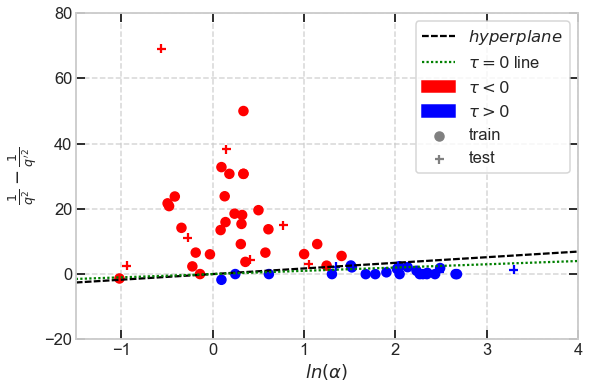

In [58]:
plt.figure(figsize=(9,6))

#plot the train data set
label=train_y.copy()
label[label<0]=0
label=label.astype(int)
label=label.values
colormap=np.array(['r','b'])
plt.scatter(train_x.iloc[:,0], train_x.iloc[:,1], marker='o', c=colormap[label])

#plot the test data set
labelt=Test_y.copy()
labelt[labelt<0]=0
labelt=labelt.astype(int)
labelt=labelt.values
plt.scatter(test_x.iloc[:,0], test_x.iloc[:,1], marker='+', c=colormap[labelt])

#calculate the hyperplane
w=per.coef_[0]
xx=np.linspace(-1.5, 4)
yy=-(w[0]*xx+per.intercept_[0])/w[1]

#plot the line
hyperplane, = plt.plot(xx, yy, dashes=[3,1],markersize=1,c='black', label='$hyperplane$')
#plt.title(u'Iteration= %d' % MaxIter)


# plt tau = 0 line
tau_zero, = plt.plot(np.linspace(-1.5,4,100),np.linspace(-1.5,4,100),dashes=[1,1],
           markersize=1,c='green',label="$\\tau=0$ line")

train_marker = plt.scatter([],[],c='grey',marker='o',label='train') 
test_marker = plt.scatter([],[],c='grey',marker='+',label='test')

tau_neg=mpatches.Patch(color='red', label="$\\tau<0$")
tau_pos=mpatches.Patch(color='blue', label="$\\tau>0$")

plt.xlim([-1.5,4])
plt.ylim([-20,80])
#plt.xticks(np.arange(-1.5,4,0.5))
#plt.yticks(range(-20,80,20))

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.8,which='both')

plt.ylabel('$\\frac{1}{q^2} - \\frac{1}{q\'^2}$')
plt.xlabel('$ln(\\alpha)$')

plt.legend(loc='best',handles=[hyperplane, tau_zero, tau_neg,tau_pos, train_marker,test_marker])
plt.show()

#plt.savefig(path+’¥¥perceptron.png’)plt.show()

In [59]:
#calculate the accuracy rate for inseparable data sets
count=0
for i in range(len(Test_y)):
    if test_y.iloc[i]==Test_y.iloc[i]:
        count+=1.0
accuracy=count/float(len(Test_y))*100
print ('Test Accuracy rate: %.2f%%' % accuracy)

count=0
for i in range(len(Train_y)):
    if train_y.iloc[i]==Train_y.iloc[i]:
        count+=1.0
accuracy=count/float(len(Train_y))*100
print ('Train Accuracy rate: %.2f%%' % accuracy)

Test Accuracy rate: 100.00%
Train Accuracy rate: 98.04%


# P_acyclic graph

In [60]:
#L_Lb = 10
#alpha = 1

def P_acyclic(L_Lb, alpha):
    q_tilde = np.sqrt(L_Lb-1)


    q = np.arange(q_tilde,0.15,-0.01)
    tau = np.log(alpha) + 0.5*(1/(q_tilde**2) - 1/(q**2) ) 
    
    # dempsters example, check other examples
    #L=3169
    #N=1624
    #B=1542
    
    #coweeta example
    L=148
    N=71
    B=38
    
    Lb = L/L_Lb
    
    alpha_tilde = (L-Lb)/(N-B)#L_Lb-1#
    print(alpha,alpha_tilde)
    P_acy = np.exp( -(alpha_tilde/alpha)*(q_tilde/q)*(np.exp(-tau) - 1)**-1  )
    x = q**-2 - q_tilde**-2
    return(x, P_acy)


1 4.036363636363636
1 4.036363636363636
1 4.44
1 4.44


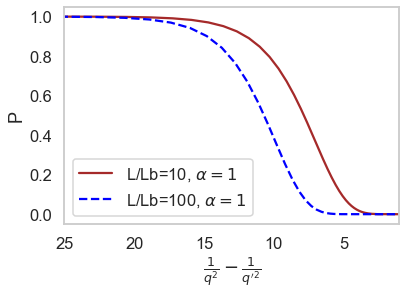

In [61]:
plt.plot(P_acyclic(10, 1)[0],P_acyclic(10, 1)[1],c='brown',label='L/Lb=10, $\\alpha=1$')

plt.plot(P_acyclic(100, 1)[0],P_acyclic(100, 1)[1],'--',c='blue',label='L/Lb=100, $\\alpha=1$')
#plt.plot(P_acyclic(100, 2)[0],P_acyclic(100, 2)[1],c='green')
plt.gca().invert_xaxis()
plt.xlim([25,1])
plt.grid(False)
plt.legend(loc='best')
plt.xlabel('$\\frac{1}{q^2} - \\frac{1}{q\'^2}$')
plt.ylabel('P')
plt.show()